<a href="https://colab.research.google.com/github/Joanachoong/Externship/blob/main/Youtube_Sample_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install textblob

In [2]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('youtube_cleaned_text.csv')
df

,Folder name,original_script,transcript_cleaned
0,Amazon_Warehouse_Process_Assistant_Pros_and_Cons,Welcome back for another video so we are going...,process assistant pros cons experience lets go...
1,From_Day_1_To_Year_6_Working_At_Amazon,"What's going on? It's your boy S V. All right,...",amazon years years lowkey think longest got vl...
2,Investigating_Why_So_Many_Amazon_Workers_Are_D...,"Since 2018, countless Amazon workers have been...",since 2018 countless amazon workers killed job...
3,Why_I_Quit_Working_At_An_Amazon_Warehouse_Job,"All right, so this video I want to talk about ...",video want talk amazon work warehouse amazon r...
4,Why_So_Many_Amazon_Workers_Are_Getting_Hurt,"For years, Amazon warehouse workers like Danie...",years amazon warehouse workers like daniel ola...


In [4]:
df['sentiment_polarity'] = df['transcript_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['transcript_cleaned'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [5]:
def label_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_polarity'].apply(label_sentiment)
df

,Folder name,original_script,transcript_cleaned,sentiment_polarity,sentiment_subjectivity,sentiment_label
0,Amazon_Warehouse_Process_Assistant_Pros_and_Cons,Welcome back for another video so we are going...,process assistant pros cons experience lets go...,0.117868,0.541142,positive
1,From_Day_1_To_Year_6_Working_At_Amazon,"What's going on? It's your boy S V. All right,...",amazon years years lowkey think longest got vl...,0.180956,0.516257,positive
2,Investigating_Why_So_Many_Amazon_Workers_Are_D...,"Since 2018, countless Amazon workers have been...",since 2018 countless amazon workers killed job...,0.014143,0.390152,neutral
3,Why_I_Quit_Working_At_An_Amazon_Warehouse_Job,"All right, so this video I want to talk about ...",video want talk amazon work warehouse amazon r...,0.075658,0.477206,neutral
4,Why_So_Many_Amazon_Workers_Are_Getting_Hurt,"For years, Amazon warehouse workers like Danie...",years amazon warehouse workers like daniel ola...,0.064890,0.402525,neutral


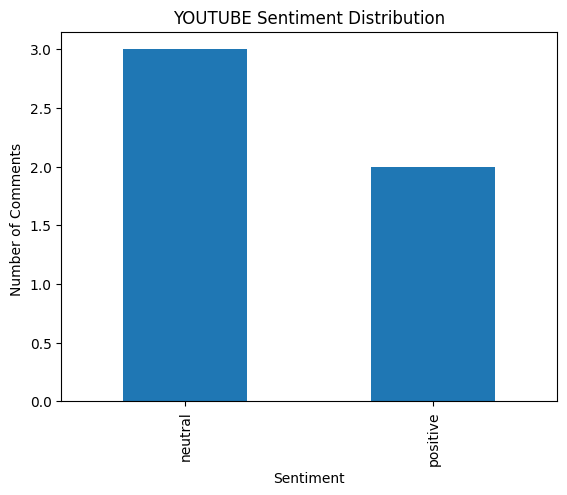

In [6]:
df['sentiment_label'].value_counts().plot(kind='bar', title="YOUTUBE Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments ")
plt.show()

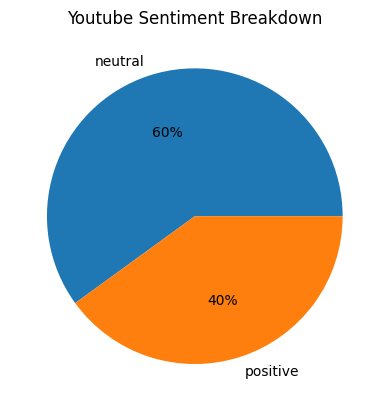

In [7]:
df['sentiment_label'].value_counts().plot(
    kind='pie',
    autopct='%1.0f%%',
    title="Youtube Sentiment Breakdown"
)
plt.ylabel('')
plt.show()

In [8]:
df.to_csv('youtube_sentiment.csv', index=False)
